Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [x] Plot the distribution of your target. 
    - Classification problem: Are your classes imbalanced? Then, don't use just accuracy.
    - Regression problem: Is your target skewed? If so, let's discuss in Slack.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline?
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

In [1]:
%%capture

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
# Column Descriptions, Acoustic Vector is Deep Learning related, so will have to skip for this application

pd.options.display.max_colwidth = 200
description = pd.read_csv("/Users/user/Documents/GitHub/MIR/Spotify/feature_description.csv")
description.dropna(how="all")

Field   \
1                         session_id    
3                   session_position    
5                     session_length    
7                     track_id_clean    
9                             skip_1    
11                            skip_2    
13                            skip_3    
15                       not_skipped    
17                    context_switch    
19              no_pause_before_play    
21           short_pause_before_play    
23            long_pause_before_play    
25      hist_user_behavior_n_seekfwd    
27     hist_user_behavior_n_seekback    
29     hist_user_behavior_is_shuffle    
31                       hour_of_day    
33                              date    
35                           premium    
37                      context_type    
39   hist_user_behavior_reason_start    
41     hist_user_behavior_reason_end    
44                          duration    
46                      release_year    
48            us_popularity_estimate    
50                      acousticness    
52                     beat_strength    
54                        bounciness    
56                      danceability    
58                    dyn_range_mean    
60                            energy    
62                          flatness    
64                  instrumentalness    
66                               key    
68                          liveness    
70                          loudness    
72                         mechanism    
74                              mode    
76                          organism    
78                       speechiness    
80                             tempo    
82                    time_signature    
84                           valence    
86                 acoustic_vector_0    
88                 acoustic_vector_1    
90                 acoustic_vector_2    
92                 acoustic_vector_3    
94                 acoustic_vector_4    
96                 acoustic_vector_5    
98                 acoustic_vector_6    
100                acoustic_vector_7    

                                                                                                                                                                           Values   
1                                                                    E.g. _65_283174c5-551c-4c1b-954b-cb60ffcc2aec - unique identifier for the session that this row is a part of   
3                                                                                                                                         {1-20} - position of row within session   
5                                                                                                                                             {10-20} - number of rows in session   
7                   E.g. _t_13d34e4b-dc9b-4535-963d-419afa8332ec - unique identifier for the track played. This is linked with track_id in the track features and metadata table.   
9                                                                                                                    Boolean indicating if the track was only played very briefly   
11                                                                                                                        Boolean indicating if the track was only played briefly   
13                                                                                                                             Boolean indicating if most of the track was played   
15                                                                                                                   Boolean indicating that the track was played in its entirety   
17   Boolean indicating if the user changed context between the previous row and the current row. This could for example occur if the user switched from one playlist to another.   
19                                                                                 Boolean indicating if there was no pause betwe

In [3]:
#import PKL Dataset ready for exploration 

infile = open("/Users/user/Documents/GitHub/MIR/Spotify/master_list2.pkl",'rb')
master_list2 = pickle.load(infile)

In [4]:
master_list2["not_skipped"] = master_list2["not_skipped"] *1

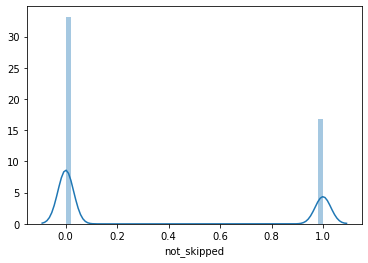

In [5]:
%matplotlib inline
import seaborn as sns
sns.distplot(master_list2['not_skipped']);

In [6]:
master_list2.shape

(1179740, 39)

In [41]:
#removing features that could 

features = ['session_position', 'session_length','hour_of_day', 'context_type',
       'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence','hist_user_behavior_n_seekfwd', 
       'hist_user_behavior_n_seekback','hist_user_behavior_is_shuffle','hist_user_behavior_reason_start', 'hist_user_behavior_reason_end']

target = 'not_skipped'
drop = ['track_id','skip_1', 'skip_2', 'skip_3', 'no_pause_before_play','short_pause_before_play', 'long_pause_before_play','context_switch']

X = master_list2[features]
y = master_list2[target]

In [42]:
#first split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
#second plit for validation holdout

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [44]:
display(X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape)

(755033, 30)

(188759, 30)

(235948, 30)

(755033,)

(188759,)

(235948,)

In [45]:
pd.set_option('display.max_columns', None)
X_train.head()

session_position  session_length  hour_of_day        context_type  \
477974                 17              18           18             catalog   
462037                  4              20           14  editorial_playlist   
1262048                11              12           10             catalog   
1412437                 6              20           17               radio   
1383487                 4              20           14     user_collection   

           duration  release_year  us_popularity_estimate  acousticness  \
477974   181.720001          2018               99.998572      0.114093   
462037   171.337875          2018               99.997649      0.057638   
1262048  247.106674          2017               99.732957      0.537306   
1412437  405.799988          1975               99.931749      0.382168   
1383487  244.453323          2008               99.872921      0.427314   

         beat_strength  bounciness  danceability  dyn_range_mean    energy  \
477974        0.461569    0.549448      0.617901        8.849613  0.844687   
462037        0.686387    0.746153      0.788657       11.187133  0.796728   
1262048       0.342885    0.361352      0.352841        6.526289  0.484482   
1412437       0.400131    0.407253      0.457441        6.833480  0.446910   
1383487       0.631352    0.657961      0.770160        9.515864  0.529571   

         flatness  instrumentalness  key  liveness  loudness  mechanism  \
477974   0.994981      1.547834e-11    2  0.415406     0.175   0.640000   
462037   1.014047      4.962339e-12   11  0.104452    -2.726   0.876884   
1262048  1.013725      9.220238e-09    3  0.393668    -7.559   0.118056   
1412437  1.011009      5.824793e-07    1  0.229564    -8.181   0.253614   
1383487  1.036306      1.728555e-08    0  0.087748    -4.779   0.665698   

          mode  organism  speechiness       tempo  time_signature   valence  \
477974   major  0.267037     0.132429  171.921005               4  0.486179   
462037   minor  0.096124     0.113998  162.078995               4  0.729522   
1262048  major  0.730248     0.042618   75.837997               4  0.601764   
1412437  major  0.592936     0.028059  129.619003               4  0.165871   
1383487  major  0.383638     0.035383   94.999001               4  0.360008   

         hist_user_behavior_n_seekfwd  hist_user_behavior_n_seekback  \
477974                              0                              0   
462037                              0                              0   
1262048                             0                              0   
1412437                             0                              0   
1383487                             0                              0   

         hist_user_behavior_is_shuffle hist_user_behavior_reason_start  \
477974                           False                       trackdone   
462037                           False                         backbtn   
1262048                          False                       trackdone   
1412437                          False                          fwdbtn   
1383487                           True                          fwdbtn   

        hist_user_behavior_reason_end  
477974                         fwdbtn  
462037                         fwdbtn  
1262048                     trackdone  
1412437                        fwdbtn  
1383487                        fwdbtn

In [ ]:
import pandas_profiling 

profile_report = master_list2.profile_report(check_correlation_pearson= False, correlations={'pearson': True,
                                                                  'spearman': False,
                                                                  'kendall': False,
                                                                  'phi_k': False,
                                                                  'cramers': False,
                                                                  'recoded':False},
                  plot ={'histogram':{'bayesian_blocks_bins': False}})

In [18]:
profile_report 

In [48]:
%%time

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import mean_absolute_error
import category_encoders as ce
from sklearn.impute import SimpleImputer

pipeline = make_pipeline(
    ce.TargetEncoder(), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train[["session_position","hour_of_day","session_length",'hist_user_behavior_is_shuffle','hist_user_behavior_reason_start']], y_train)
print('Validation Accuracy', pipeline.score(X_val[["session_position","hour_of_day","session_length",'hist_user_behavior_is_shuffle','hist_user_behavior_reason_start']], y_val))

Validation Accuracy 0.7329981616770591
CPU times: user 4min 19s, sys: 6.2 s, total: 4min 25s
Wall time: 1min 39s


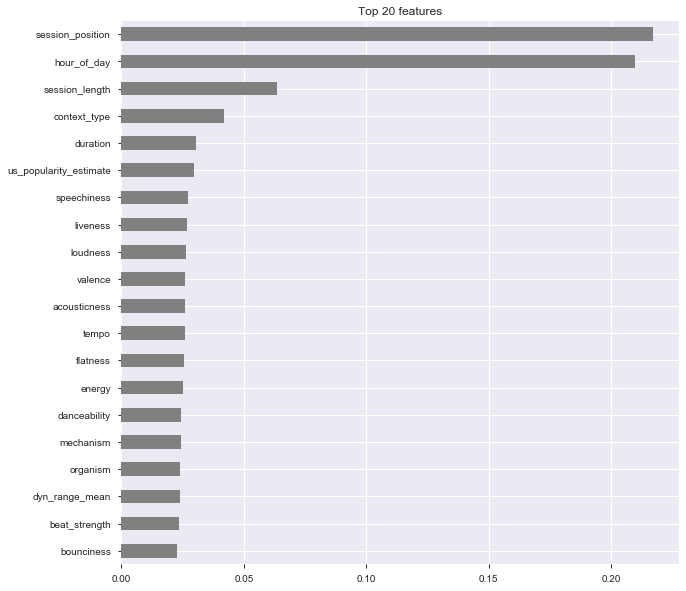

In [22]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [37]:
transformers = make_pipeline(
    ce.OrdinalEncoder()
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [38]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, 
    scoring='accuracy', 
    n_iter=5, 
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                     

In [39]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

session_length            0.009839
session_position          0.007782
context_type              0.006046
hour_of_day               0.001052
time_signature           -0.000199
mode                     -0.001240
key                      -0.005061
instrumentalness         -0.006675
organism                 -0.006722
mechanism                -0.006732
danceability             -0.006851
beat_strength            -0.007005
energy                   -0.007226
bounciness               -0.007523
liveness                 -0.007868
flatness                 -0.008100
loudness                 -0.008308
dyn_range_mean           -0.008530
acousticness             -0.008701
tempo                    -0.008991
valence                  -0.009082
release_year             -0.014049
us_popularity_estimate   -0.019838
speechiness              -0.020046
duration                 -0.025095
dtype: float64

In [40]:
eli5.show_weights(
    permuter, 
    top=None, # show permutation importances for all features
    feature_names=feature_names
)